# Module 1: C Programming
---
## Introduction
Welcome to the course! Before we jump in and start writing programs that utilize our GPU, it's important to have a strong understanding of C.

This assignment will cover:
* C syntax, pointers, and memory allocation
* Data structures (Linked List)
* File I/O
---
## Assignment
There are three parts to this assignment:
* Part 0: Colab Basics
* Part 1: Stock Portfolio
* Part 2: The Caesar Shift Cipher
---
## Module Learning Objectives
* Becoming familiar with C syntax
* Reviewing the usage of pointers, data structures, and linked lists
* Reviewing dynamic memory allocation
* File I/O
* Introduce ciphers, encryption, and decryption

## Part 0: Colab Basics

### Git and `UNIX` commands

We can use Colab to run both our C and CUDA programs. Before starting each module, you'll need to do a `git clone` in order to obtain repository containing the resources for each module.

In [ ]:
!git clone https://github.com/rahultoppur/CUDA

Cloning into 'CUDA'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (378/378), done.
remote: Compressing objects: 100% (261/261), done.
remote: Total 378 (delta 164), reused 249 (delta 80), pack-reused 0
Receiving objects: 100% (378/378), 4.44 MiB | 9.61 MiB/s, done.
Resolving deltas: 100% (164/164), done.


Once you run the above cell, you'll see the "Files" section on the left populated with the corresponding directories. Each module has the required files you need to complete each part of the assignment. If the notebook becomes inactive for a period of time, you may need to re-run this cell (along with other cells that contain your code) to re-populate your local files.

We can also run UNIX commands within Colab. For example, here's a small snippet of running `ls` and `pwd` to see the contents of our current directory. We can either run both of these commands directly be prefacing each with a `!` character (such as `!ls` or `!pwd`) or by using `%%sh` within the cell.

In [ ]:
!pwd

/content


In [ ]:
%%sh

ls
echo "My current directory is: " $(pwd)

CUDA
test
test.c
My current directory is:  /content


### Writing our own programs

Now let's try creating and running our own simple C program. Make sure to place `%%writefile <your-filename.c>` at the top of the cell. We'll do something similar in order to run our CUDA programs, but we'll see how to do that in the next module.

In [ ]:
%%writefile hello.c

#include <stdio.h>

int main()
{
  printf("Hello, World!\n");
 
  return 0;
}

Overwriting hello.c


Once you're ready to compile, we can use `gcc` like normal to produce and run our executable.

In [ ]:
# Compile our program using gcc
!gcc hello.c -o hello

# Run our executable
!./hello

Hello, World!


You now can write and compile your own C programs--you're all set to complete Module 1!

## Part 1: Stock Portfolio

### Introduction

It's nearing April 15th, and after a year of investing it's time to do your taxes. You've made quite a few risky investments in the stock market, and you need to find the total value of your portfolio. Throughout the year, you have noted down each of your trades in a file named `portfolio.txt`. The complete filepath should be: `/content/CUDA/module_1_C/stocks/portfolio.txt`. You can also obtain it by clicking the three dots and selecting `Copy path`. This file has the following format:

```txt
GOOG 2000 2080 1
TSLA 600 572 4
FB 255 261 4
```
Each row contains:
* Ticker-tape symbol (`GOOG`)
* Purchase price (`2000`)
* Current price (`2080`)
* Number of shares (`1`)

### Linked List

Your task is to create a Linked List populated with the stocks from `portfolio.txt`.

Recall that a Linked List has the following structure:

```c
typedef struct node {
    int data;
    struct node* next;
} node_t;
```

Each node has some value associated with it, as well as a pointer to the next node in the list. In this assignment, you'll need to allocate memory using `malloc` and make sure you `free` that memory before your program terminates. Each node will be represented by a stock `struct`.

### Hints

* Remember that a string in an array of characters, so when allocating memory for your struct, you'll also need to allocate memory for each of the strings. Functions like `strlen` (remember to add 1 for the null terminator) and `strcpy` would be useful here.

### File I/O

You will have to read from a file in order to populate your Linked List. `fscanf` can help with this:
```c
int fscanf(FILE* fp, char* format, ...)
```
`fscanf` is identical to other C functions like `scanf` and `printf`, except that the first argument is a file pointer and the second argument is the desired format string. Note that the arguments to `fscanf` must be pointers: `fscanf(myfile, &n)` vs. `fscanf(myfile, n)`.

### Tasks

* The defintion for a `stock` struct in the starter code is incomplete--go ahead and fix this.
* Implement the following functions:
  * `create_portfolio`: Creates a Linked List (where each element is a stock)
  * `free_portfolio`: Frees your Linked List (free every node that you have allocated memory for)
  * `print_portfolio`: Prints your Linked List in the following format:
  ```
  GOOG  | 2000  | 2080  | 1     |
  TSLA  | 600   | 572   | 4     |
  FB    | 255   | 261   | 4     |
  ```
You can use the "left-justify" option of printf to obtain the format above `printf("%-5d", baz)`
  * `total_value`: Finds the total value of the portfolio

### Starter Code
Some starter code has been provided for you.

In [ ]:
%%writefile stocks.c

/* 
 * stocks.c 
 *
 * Read the contents of portfolio.txt and store each 
 * entry as a Linked List of stocks.
 *
 * Compile with: !gcc -o stocks stocks.c
 * Run with: !./stocks
 */

#include <stdio.h>
#include <stdlib.h>

/* TODO: Finish implementing the stock_t type */
typedef struct stock {
    char* symbol;       /* Ticker-tape symbol (i.e., GOOG) */
    ...
    ...

}stock_t;

/* TODO: Declare your function prototypes here */
/* Note that you may need to change the signatures provided */
void print_portfolio(...);
void create_portfolio(...);
void free_portfolio(...);
void total_value(...);

/* Add any other helper functions you would like */

int main() {
    ...
    return 0;
}

Overwriting stocks.c


## Part 2: Caesar Shift Cipher

### Introduction

The Caesar shift cipher was introduced during the Gallic Wars during Rome's conquest of Gaul (modern-day France). The cipher is based on a cipher alphabet that was shifted a certain number of places (we'll call this the key, `k`) relative to the plain alphabet.

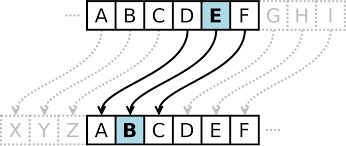

> A Caesar shift of 3.

Suetonius, a Roman historian, mentioned that Caesar only used a shift of three places. But, it's clear to see that any shift between 1 and 25 would result in 25 distinct cipher alphabets.

One of the main drawbacks of the Caesar shift is that it is extremely vulnerable to brute-force attacks. An attacker can simply try all possible values for `k` and would be able to decrypt the resulting message.

In this assignment, you are given a ciphertext `c` (all in lowercase). You will need to brute-force all possible keys `k` in order to crack the code!

### Hints

* It can be helpful to think of the "wrap-around" behavior of the Caesar shift with regards to the modulo function. Also, every `char` can be converted to its corresponding `int` for the `ASCII` character set.

### Tasks

* Brute-force all possible keys `k` in order to crack the Caesar shift cipher.

* When writing your solution, display each attempt for `k` on a separate line:
```txt
cclzmlu
bbkylkt
aajxkjs
...
```
Out of the 25 possiblities, one message should make sense!


> Which value of `k` decrypted the message? What does the message say?

> **TODO:** Your answer here



### Starter Code

Some starter code has been provided for you.

In [ ]:
%%writefile caesar.c

/* 
 * caesar.c
 *
 * Decrypt the given ciphertext to find the encrypted plaintext. 
 *
 * Compile with: !gcc -o caesar caesar.c
 * Run with: !./caesar
 */

#include <stdio.h>

int main() {
    char msg[] = "dahhk pdana cajanwh gajkxe";

    /* TODO: Decrypt the ciphertext. */

    return 0;
}


Writing caesar.c


## All Done?
Navigate to `File` > `Download` > `Download .ipynb`. You can later submit this `.ipynb` file as an attachment after running each of your cells in the [Course Feedback survey](https://docs.google.com/forms/d/e/1FAIpQLSfAYjrJ04aurqE96z-OdUVWsLwdlq14oPKBUJRkShzfZtn6Gg/viewform).